<a href="https://colab.research.google.com/github/atul107/Keyword_Extraction/blob/master/KeyWordExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas
dataset = pandas.read_csv('papers.csv')
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [9]:
dataset['word_count']=dataset['paper_text'].apply(lambda x:len(str(x).split()))
dataset[['title','word_count']].head()

,title,word_count
0,Self-Organization of Associative Database and ...,3703
1,A Mean Field Theory of Layer IV of Visual Cort...,2615
2,Storing Covariance by the Associative Long-Ter...,3012
3,Bayesian Query Construction for Neural Network...,3296
4,"Neural Network Ensembles, Cross Validation, an...",3430


In [10]:
dataset.word_count.describe()

count     7241.000000
mean      4849.317912
std       1411.949448
min          0.000000
25%       3639.000000
50%       5102.000000
75%       5898.000000
max      22249.000000
Name: word_count, dtype: float64

In [12]:
freq= pandas.Series(' '.join(dataset['paper_text']).split()).value_counts()[:20]
freq

the     1741341
of       992459
and      737835
?        643837
a        585149
to       565402
is       496162
in       472178
for      350809
that     291198
=        282147
,        226448
we       226390
with     223759
The      208088
on       193614
.        190768
by       184927
are      182535
as       181125
dtype: int64

In [15]:
freq1= pandas.Series(' '.join(dataset['paper_text']).split()).value_counts()[-20:]
freq1

,tpre             1
17:333?           1
2B,C,             1
87786.            1
exp(8.4375s       1
pendulum-swing    1
(72'T}O           1
H?               1
MSLR-WEB10K       1
Sec.2);           1
c=G               1
cortex3           1
Valuations.       1
olfaction:        1
w*||              1
1)/Amax           1
25(1):40-         1
query-time.       1
J                1
98.9(0.6)         1
dtype: int64

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [21]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [0]:
corpus = []
for i in range(0, 7241):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['paper_text'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [25]:
#View corpus item
corpus[221]

'visual cortex circuitry orientation tuning trevor undel department neurology university chicago chicago il mundel math uchicago edu alexander dimitrov department mathematics university chicago chicago il dimitrov ucllicago edu jack cowan department mathematics neurology university chicago chicago il cowan math uchicago edu abstract simple mathematical model scale circuitry primary visual cortex introduced basic cortical architecture recurrent local excitation lateral inhibition account quantitatively property orientation tuning model account local effect cross orientation suppression nonlocal state dependent coupling similar orientation patch added model satisfactorily reproduce effect non local iso orientation suppression non local crossorientation enhancement following account given perceptual phenomenon involving object segmentation popout direct indirect tilt illusion introduction edge detection mechanism primate visual cortex vi involves least fairly well characterized circuit lo

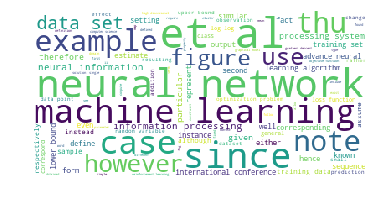

In [29]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [32]:
list(cv.vocabulary_.keys())[:20]

['self',
 'organization',
 'associative',
 'database',
 'application',
 'japan',
 'efficient',
 'organizing',
 'proposed',
 'together',
 'robot',
 'associate',
 'input',
 'output',
 'half',
 'part',
 'discussion',
 'aspect',
 'hardware',
 'produce']

[Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'function'),
 Text(0, 0, 'data'),
 Text(0, 0, 'set'),
 Text(0, 0, 'network'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'time'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'number'),
 Text(0, 0, 'figure'),
 Text(0, 0, 'matrix'),
 Text(0, 0, 'value'),
 Text(0, 0, 'parameter'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'image'),
 Text(0, 0, 'training'),
 Text(0, 0, 'state')]

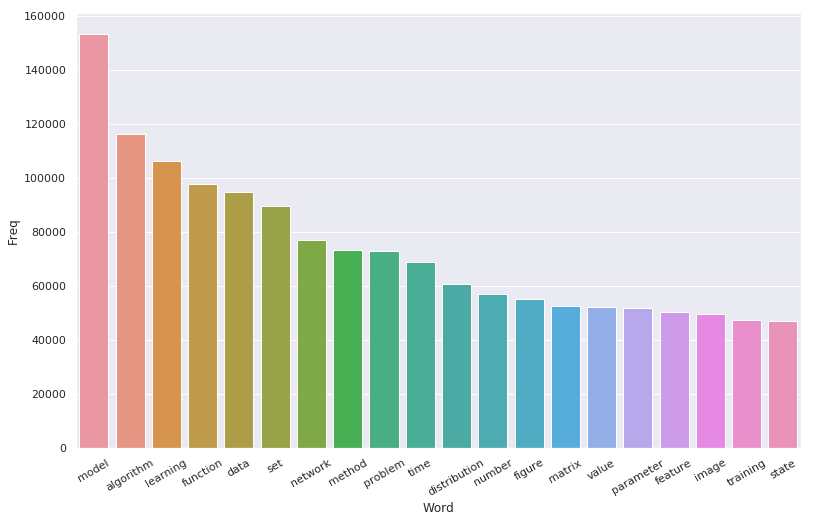

In [33]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                     Bi-gram   Freq
0                      et al  20583
1             neural network  20086
2           machine learning  15768
3                   data set   9594
4     information processing   9585
5         neural information   9098
6          processing system   9044
7               training set   7642
8         learning algorithm   7215
9                lower bound   7110
10  international conference   6900
11            advance neural   6816
12               figure show   5958
13             training data   5869
14             loss function   5740
15                   log log   5692
16      optimization problem   5590
17               upper bound   5552
18                data point   5443
19           random variable   5212


[Text(0, 0, 'et al'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'information processing'),
 Text(0, 0, 'neural information'),
 Text(0, 0, 'processing system'),
 Text(0, 0, 'training set'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'international conference'),
 Text(0, 0, 'advance neural'),
 Text(0, 0, 'figure show'),
 Text(0, 0, 'training data'),
 Text(0, 0, 'loss function'),
 Text(0, 0, 'log log'),
 Text(0, 0, 'optimization problem'),
 Text(0, 0, 'upper bound'),
 Text(0, 0, 'data point'),
 Text(0, 0, 'random variable')]

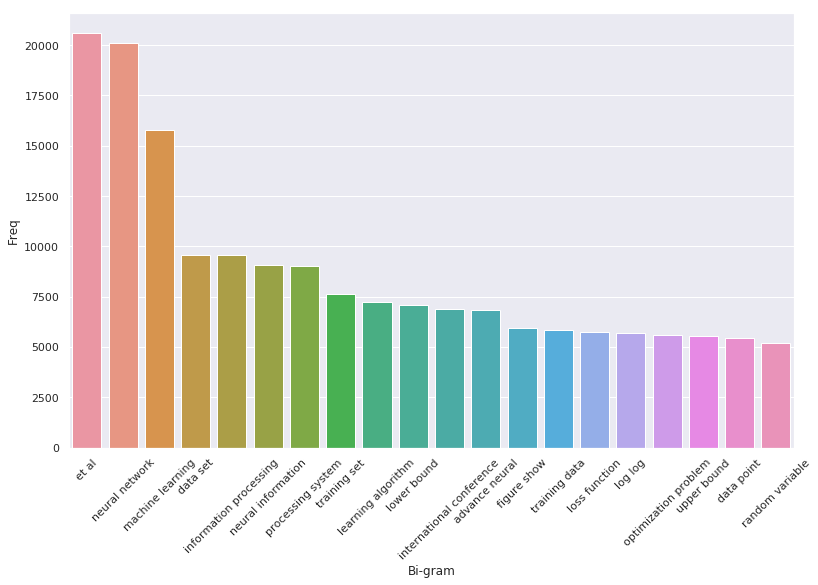

In [34]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                            Tri-gram  Freq
0      neural information processing  8996
1      information processing system  8851
2         advance neural information  6687
3               arxiv preprint arxiv  3621
4        conference machine learning  3544
5   international conference machine  3368
6          machine learning research  3220
7           journal machine learning  3077
8             processing system page  2644
9              processing system nip  2441
10            support vector machine  2364
11       th international conference  1615
12       department computer science  1535
13                       log log log  1519
14               hidden markov model  1504
15          recurrent neural network  1501
16       proceeding th international  1464
17     conference neural information  1452
18          semi supervised learning  1452
19       stochastic gradient descent  1383


[Text(0, 0, 'neural information processing'),
 Text(0, 0, 'information processing system'),
 Text(0, 0, 'advance neural information'),
 Text(0, 0, 'arxiv preprint arxiv'),
 Text(0, 0, 'conference machine learning'),
 Text(0, 0, 'international conference machine'),
 Text(0, 0, 'machine learning research'),
 Text(0, 0, 'journal machine learning'),
 Text(0, 0, 'processing system page'),
 Text(0, 0, 'processing system nip'),
 Text(0, 0, 'support vector machine'),
 Text(0, 0, 'th international conference'),
 Text(0, 0, 'department computer science'),
 Text(0, 0, 'log log log'),
 Text(0, 0, 'hidden markov model'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'proceeding th international'),
 Text(0, 0, 'conference neural information'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'stochastic gradient descent')]

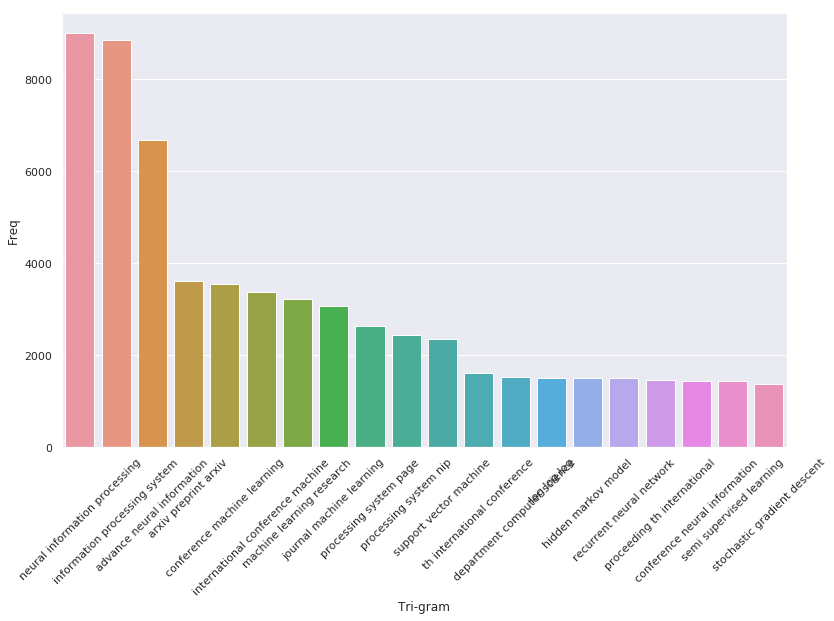

In [35]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
doc1= 'Natural language processing is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human languages, in particular how to program computers to process and analyze large amounts of natural language data.'
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc1]))

In [47]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc1)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
Natural language processing is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human languages, in particular how to program computers to process and analyze large amounts of natural language data.

Keywords:
natural language 0.528
language 0.406
natural language processing 0.288
language processing 0.275
concerned 0.266
